In [1]:
# Install and import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the Dataset
data=pd.read_csv('jobs_in_data.csv')

In [3]:
data.head()

,work_year,job_category,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data Engineering,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architecture and Modeling,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architecture and Modeling,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Science and Research,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Science and Research,93300,United States,Senior,Full-time,In-person,United States,M


In [4]:
unique_job_categories = data['job_category'].unique()
for category in unique_job_categories:
    print(category)

Data Engineering
Data Architecture and Modeling
Data Science and Research
Machine Learning and AI
Data Analysis
Leadership and Management
BI and Visualization
Data Quality and Operations
Data Management and Strategy
Cloud and Database


# Data Preprocessing

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_category        9355 non-null   object
 2   salary_in_usd       9355 non-null   int64 
 3   employee_residence  9355 non-null   object
 4   experience_level    9355 non-null   object
 5   employment_type     9355 non-null   object
 6   work_setting        9355 non-null   object
 7   company_location    9355 non-null   object
 8   company_size        9355 non-null   object
dtypes: int64(2), object(7)
memory usage: 657.9+ KB


In [6]:
data.columns

Index(['work_year', 'job_category', 'salary_in_usd', 'employee_residence',
       'experience_level', 'employment_type', 'work_setting',
       'company_location', 'company_size'],
      dtype='object')

In [7]:
# The dataset includes 9,355 rows and 9 columns
data.shape

(9355, 9)

In [8]:
# Checking the null values in the data
data.isna().sum().sort_values(ascending=False)

work_year             0
job_category          0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

In [9]:
# Understanding the statistics in the data set
data.describe()

,work_year,salary_in_usd
count,9355.000000,9355.000000
mean,2022.760449,150299.495564
std,0.519470,63177.372024
min,2020.000000,15000.000000
25%,2023.000000,105700.000000
50%,2023.000000,143000.000000
75%,2023.000000,186723.000000
max,2023.000000,450000.000000


In [10]:
data.head()

,work_year,job_category,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data Engineering,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architecture and Modeling,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architecture and Modeling,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Science and Research,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Science and Research,93300,United States,Senior,Full-time,In-person,United States,M


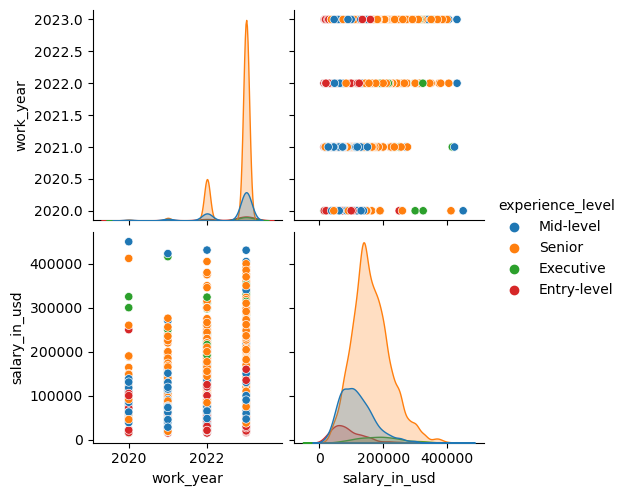

In [11]:
sns.pairplot(data,hue='experience_level')

### Observation:
#### Pairplot
- This visualization can demonstrate how there is a lot more data for senior experience level in the data set.

In [12]:
datanew=data[['work_year','salary_in_usd']]

In [13]:
corr=data[['work_year','salary_in_usd']].corr()

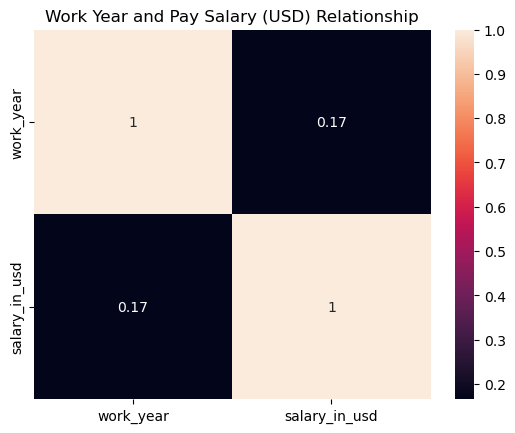

In [14]:
# Relationship between work year and pay salary (USD)
sns.heatmap(corr,annot=True)
plt.title("Work Year and Pay Salary (USD) Relationship")
plt.show()

### Observation:
#### Heatmap
- This can demonstrate there is no correlation between work year and salary. 

# Explore Data Analysis (EDA) Process

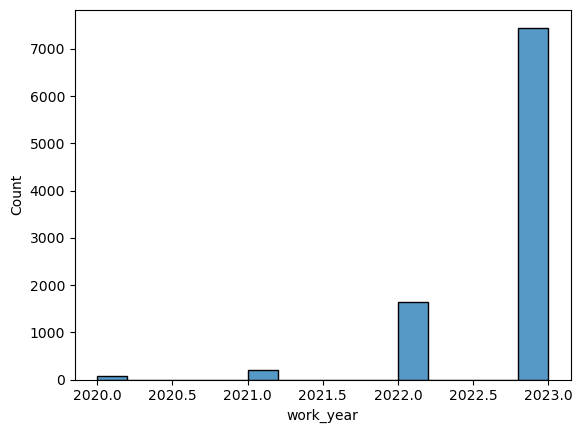

In [15]:
# Investigating the distribution of Revenue
sns.histplot(x='work_year', data=data)
plt.show()

### Observation:
#### Histogram
- Approximately left-skewed, there's more data for 2023 compared to the rest of the other years.  

In [16]:
data['work_year'].value_counts()

2023    7453
2022    1634
2021     197
2020      71
Name: work_year, dtype: int64

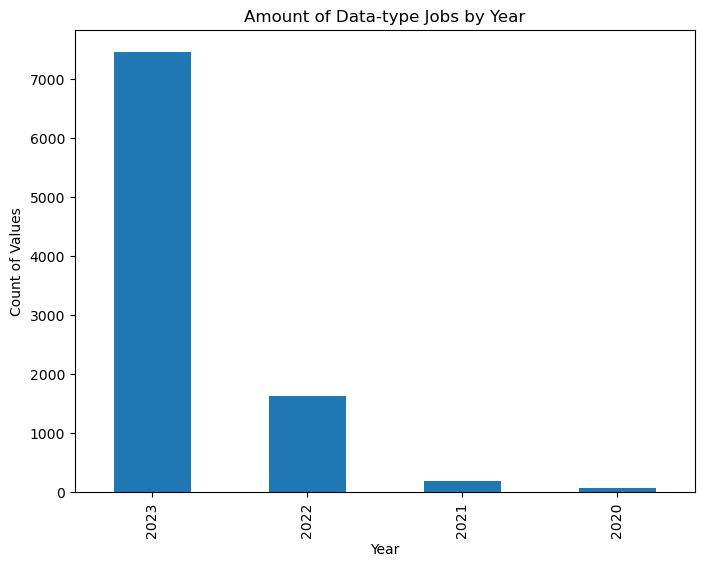

In [17]:
data['work_year'].value_counts().sort_values(ascending=False)\
.plot(kind='bar',figsize=(8,6),title= "Amount of Data-type Jobs by Year")
plt.xlabel("Year")
plt.ylabel("Count of Values")
plt.show()

### Observation:
#### Bar Chart
- The year 2023 had the most amount of data than the rest of the other years.
- Meanwhile, for the year 2020, it had minimal data.

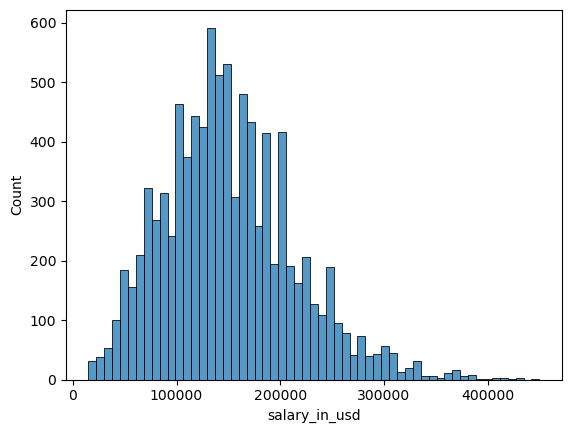

In [18]:
sns.histplot(x='salary_in_usd', data=data)
plt.show()

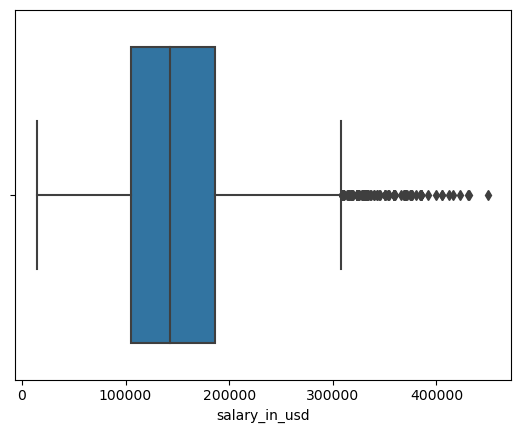

count      9355.000000
mean     150299.495564
std       63177.372024
min       15000.000000
25%      105700.000000
50%      143000.000000
75%      186723.000000
max      450000.000000
Name: salary_in_usd, dtype: float64

In [19]:
sns.boxplot(x='salary_in_usd', data=data)
plt.show()
data['salary_in_usd'].describe()

### Observation:
#### Histogram and Boxplot
- The two graphs demonstrate an approximately right-skewed distribution, with possible outliers after the 300,000 salary range.

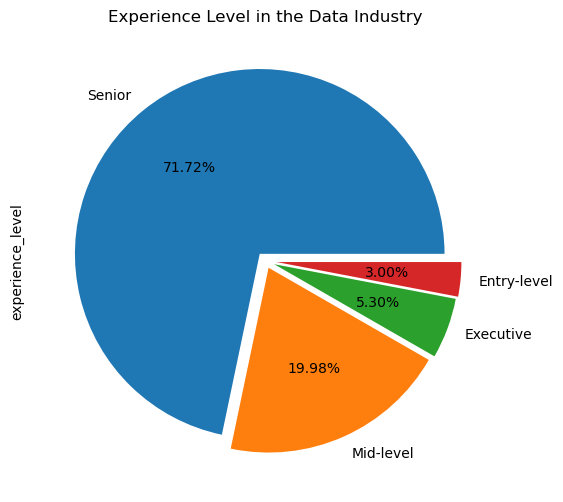

In [20]:
# Experience level in the Dataset
data["experience_level"].value_counts().sort_values(ascending=False)\
.plot(kind='pie', figsize=(8,6),title="Experience Level in the Data Industry", explode=[0.05,0.04,0.05,0.06],
      labels=['Senior', "Mid-level", "Executive", 'Entry-level'],
      autopct='%1.2f%%')
plt.show()

### Observation:
#### Pie chart
- In the pie chart, we can observe how companies hire and focus more on senior-level roles, approximately 72%.
- On the other hand, only 3% of companies recruit Entry-level positions.

## Understanding Salary with Experience Level

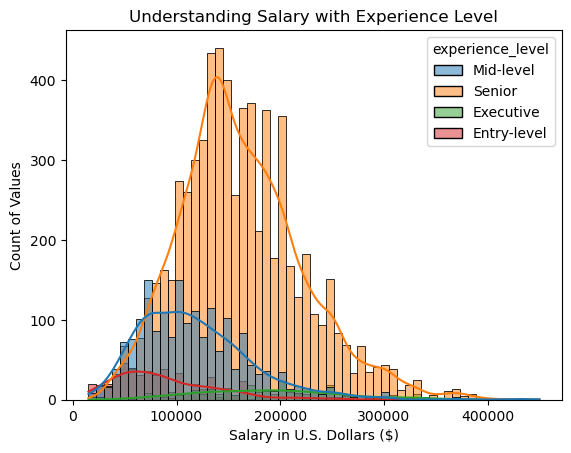

In [21]:
sns.histplot(data=data,x='salary_in_usd', hue='experience_level', kde=True)
plt.title("Understanding Salary with Experience Level")
plt.xlabel("Salary in U.S. Dollars ($)")
plt.ylabel("Count of Values")
plt.show()

In [22]:
senior_level= data[data['experience_level'] == 'Senior']
average_salary_senior_level = senior_level['salary_in_usd'].mean()
print(f"The average salary for senior-level positions is: ${average_salary_senior_level:.2f}")

The average salary for senior-level positions is: $162356.13


In [23]:
mid_level= data[data['experience_level'] == 'Mid-level']
average_salary_mid_level = mid_level['salary_in_usd'].mean()
print(f"The average salary for mid-level positions is: ${average_salary_mid_level:.2f}")

The average salary for mid-level positions is: $117523.92


In [24]:
entry_level= data[data['experience_level'] == 'Entry-level']
average_salary_entry_level = entry_level['salary_in_usd'].mean()
print(f"The average salary for entry-level positions is: ${average_salary_entry_level:.2f}")

The average salary for entry-level positions is: $88534.78


In [25]:
executive_level= data[data['experience_level'] == 'Executive']
average_salary_executive_level = executive_level['salary_in_usd'].mean()
print(f"The average salary for executive-level positions is: ${average_salary_executive_level:.2f}")

The average salary for executive-level positions is: $189462.91


### Observation:
-	A senior position receives an average of approximately 162k and a max of 400k in pay salary compared to other experience levels. 
-	A mid-level position receives an average of $117k; however, a few receive more than a 400k salary.
-	As for Entry-level positions, the average is about 88k per year, whereas the max can be up to 250k.
-	An executive experience level can average 189k and max around 400k.
-	Lastly, most experience levels can demonstrate a right-skewed distribution.

## Understanding Company Size to Salary 

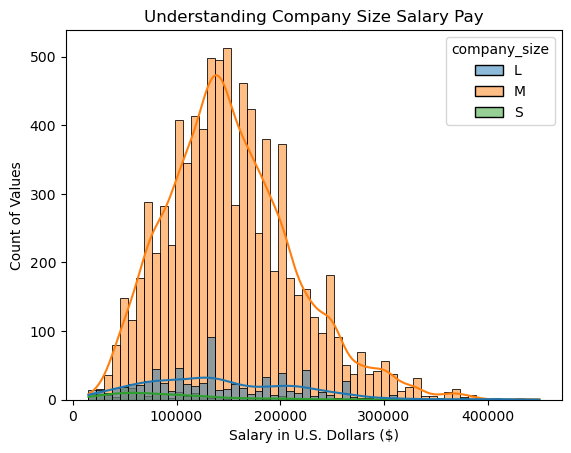

In [26]:
sns.histplot(data=data,x='salary_in_usd', hue='company_size', kde=True)
plt.title("Understanding Company Size Salary Pay")
plt.xlabel('Salary in U.S. Dollars ($)')
plt.ylabel('Count of Values')
plt.show()

In [27]:
small_size= data[data['company_size'] == 'S']
average_salary_small_size = small_size['salary_in_usd'].mean()
print(f"The average salary for a small size company is: ${average_salary_small_size:.2f}")

The average salary for a small size company is: $90642.60


In [28]:
medium_size= data[data['company_size'] == 'M']
average_salary_medium_size = medium_size['salary_in_usd'].mean()
print(f"The average salary for a medium size company is: ${average_salary_medium_size:.2f}")

The average salary for a medium size company is: $152237.09


In [29]:
large_size= data[data['company_size'] == 'L']
average_salary_large_size = large_size['salary_in_usd'].mean()
print(f"The average salary for a large size company is: ${average_salary_large_size:.2f}")

The average salary for a large size company is: $141097.16


### Observation:
-	A small sized company's average salary is around 90k and max more than 250k.
-	A medium sized company's average salary is around 152k and max up to 400k.
-	A larger company average salary is around 141k and has a max more than 400k.

## Understanding Average Salary with Experience Level

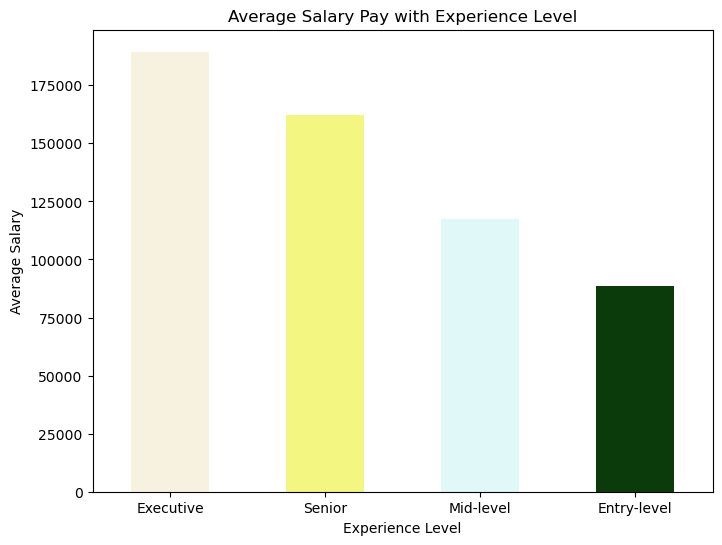

In [30]:
data.groupby(['experience_level'])['salary_in_usd'].mean().sort_values(ascending=False)\
.plot(kind='bar', title= "Average Salary Pay with Experience Level", figsize=(8,6), color=['#F7F2E0', '#F3F781', '#E0F8F7', 
                                                                                          '#0B3B0B'])
plt.xlabel("Experience Level"), 
plt.ylabel("Average Salary")
plt.xticks(rotation=0)
plt.show()

### Observation:
* Executive-level positions received the highest salaries, while entry-level positions received the least.

## Understanding Average Salary in the Data Field

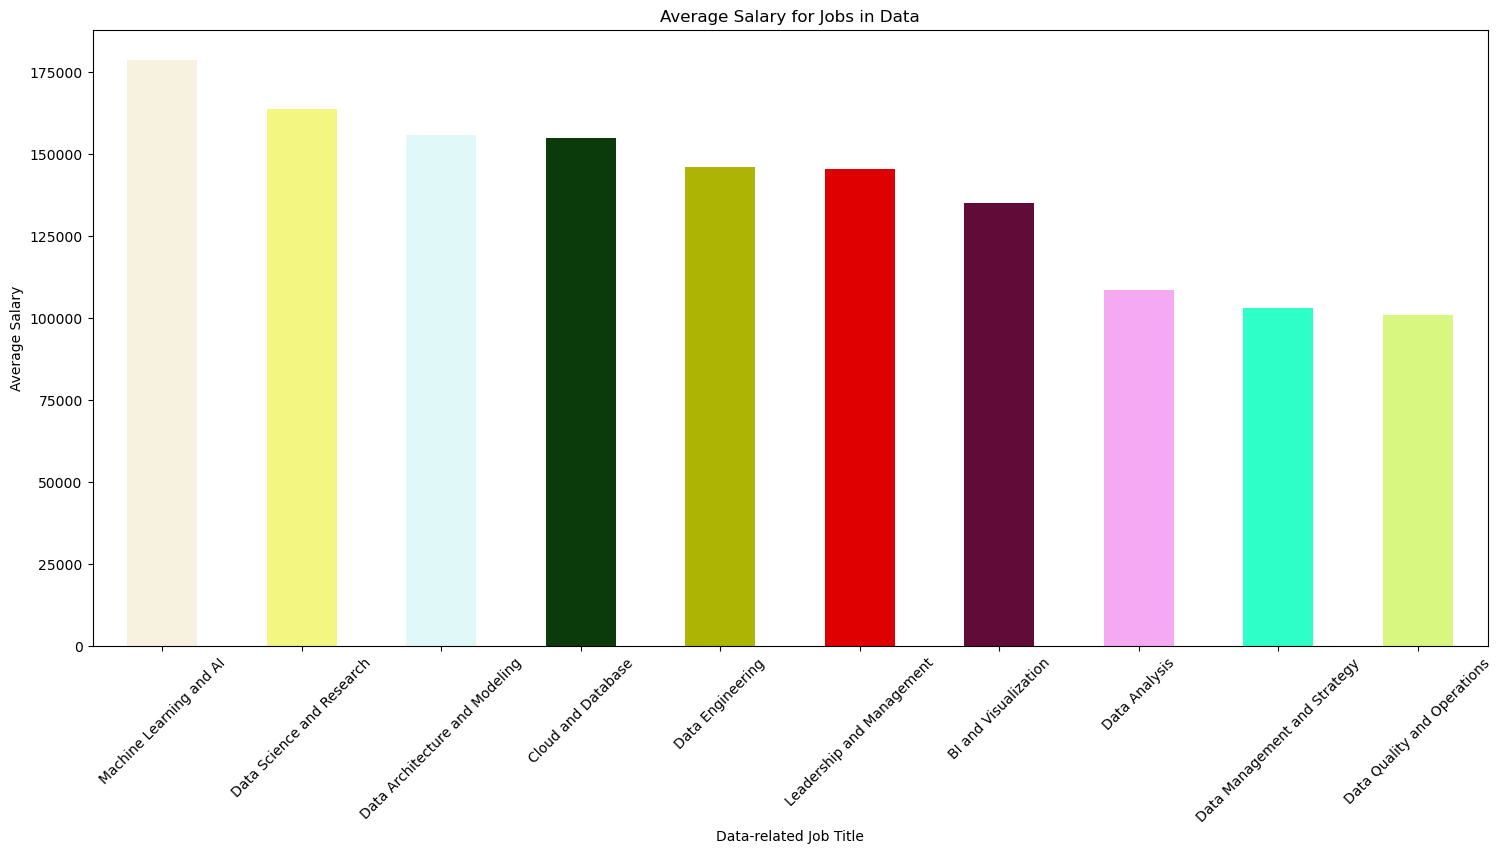

In [31]:
data.groupby(['job_category'])['salary_in_usd'].mean().sort_values(ascending=False)\
.plot(kind='bar', figsize=(18,8), title= "Average Salary for Jobs in Data", color=['#F7F2E0', '#F3F781', '#E0F8F7','#0B3B0B', 
                                                                                   '#AEB404','#DF0101','#610B38','#F5A9F2',
                                                                                   '#2EFEC8','#D8F781'])
plt.xlabel("Data-related Job Title")
plt.ylabel("Average Salary")
plt.xticks(rotation=45)
plt.show()

### Observation:
-	Machine Learning and AI get the highest average salary compared to other roles in the data field.
-	However, other job positions like Data Science and Research, Data Architecture and Modeling, Cloud and Database, Data Engineering, Leadership and Management, and BI and Visualization are right behind.

## Understanding Small Companys Pay

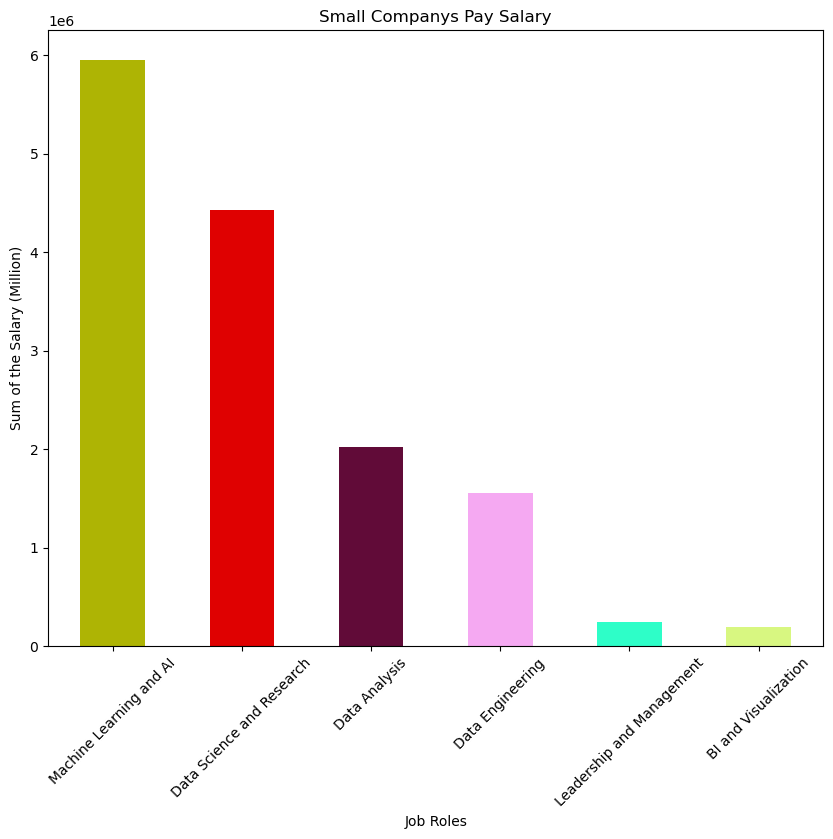

In [32]:
small=data['company_size']=='S'
data.loc[small].groupby(['job_category'])['salary_in_usd'].sum().sort_values(ascending=False)\
.plot(kind='bar', figsize=(10,8),title= "Small Companys Pay Salary", color=['#AEB404','#DF0101','#610B38',
                                                                            '#F5A9F2','#2EFEC8','#D8F781'])
plt.xlabel("Job Roles")
plt.ylabel("Sum of the Salary (Million)")
plt.xticks(rotation=45)
plt.show()

### Observation:
-	From the chart above, ML and AI are the highest-paying jobs in small companies.
-	In addition, this can also demonstrate how ML and AI are now becoming vital roles in the data field.

## Top 5 most demanding Data Role in the USA

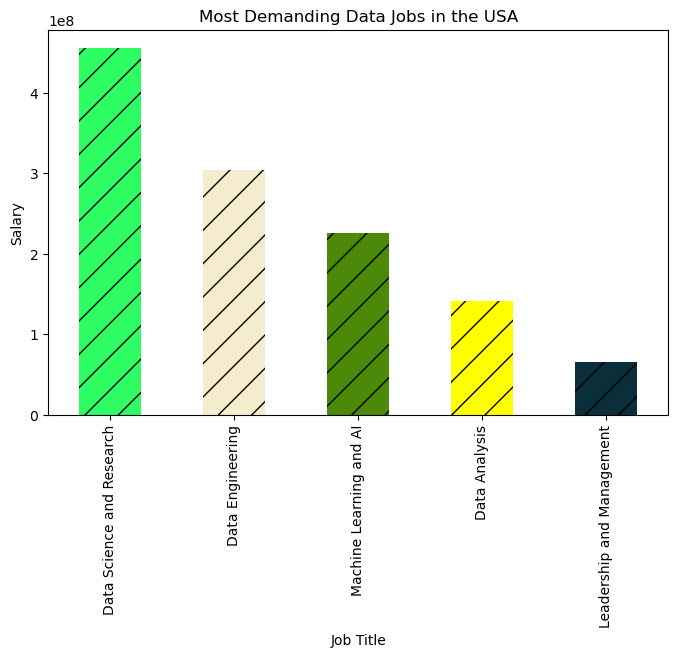

In [33]:
USA=data['employee_residence']=="United States"
data.loc[USA].groupby('job_category')['salary_in_usd'].sum().sort_values(ascending=False).head(5)\
.plot(kind='bar', title="Most Demanding Data Jobs in the USA", figsize=(8,5), color=['#2EFE64','#F5ECCE','#4B8A08','#FFFF00','#0B2F3A'],hatch='/')
plt.xlabel("Job Title")
plt.ylabel("Salary")
plt.show()

### Observation:
-	From the chart above, data science/research is considered the most important career in the data field.

In [34]:
# Average pay salary of large companies employment type
large=data['company_size']=='L'
data.loc[large].groupby(['employment_type'])[['salary_in_usd']].mean().sort_values(by='salary_in_usd', ascending=False)

,salary_in_usd
employment_type,
Full-time,142194.226902
Contract,113500.666667
Part-time,36944.600000
Freelance,20000.000000


### Observation:
* Based in large company size, a full-time employee has a higher pay salary than other employment types.

## Most Frequent Data Position

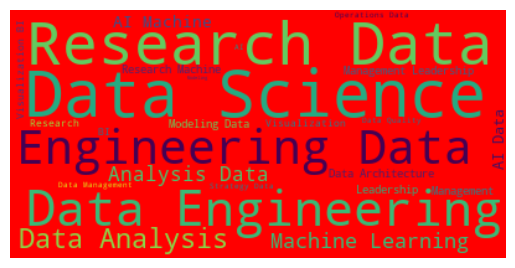

In [35]:
# Import the wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text3 = ' '.join(data['job_category'])

wordcloud2 = WordCloud(mode='RGB', background_color='red').generate(text3)

# Generate plot
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')
plt.show()

### Observation:
- From this visualization, you can see how data science, research, and data engineering are words that stick out compared to other careers in the data industry. 